#  Retail data analytics blackfriday sales customer purchase behaviour 

## 1. Problem Statement

Understand the customer purchase behaviour against various products and grouping the customers with same behaviour


## 2.  Data Loading and Description

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Model libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


#Other Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


### Importing Datasets:

In [2]:
sales = pd.read_csv('https://raw.githubusercontent.com/VijayMukkala/Machine-Learning-with-Python/master/Balck%20Friday%20Sales%20Behaviour%20based%20on%20pruchase%20and%20Sales%20prediction/train.csv')
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 3. Exploratory Data Analysis

In [3]:
print('Shape of the dataset :',sales.shape)

Shape of the dataset : (550068, 12)


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.9+ MB


In [5]:
# TO check on the statistics
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
# checking the columns used in the dataset
sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

- For our analysis, 'Product_Category_2', 'Product_Category_3' are removed because as per the data description if   Product_Category_1 is not right for a row then product might be in the Product_Catgory_2 or Product_Category_3 so for our analysis assuming that the Product_Category_1 will have all data correct and we see that there are missing values in 'Product_Category_2', 'Product_Category_3' columns. Hence we will drop these columns 

- Also dropping 'Product_ID' which is not useful for further analysis

In [7]:
sales.drop(columns=['Product_Category_2','Product_Category_3','Product_ID'],inplace=True)

In [8]:
sales1=sales.drop_duplicates(subset='User_ID')

### 3.1 Working on Product Category column

In [9]:
product_cat=sales[['User_ID','Product_Category_1']]

In [10]:
product = pd.get_dummies(product_cat, columns= ['Product_Category_1'])

In [11]:
final_product = pd.pivot_table(data = product, index = 'User_ID', values = list(product.columns.values[1:]), aggfunc = 'sum')
final_product.reset_index(inplace=True)

In [12]:
final_product.head()

,User_ID,Product_Category_1_1,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,...,Product_Category_1_19,Product_Category_1_2,Product_Category_1_20,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9
0,1000001,4,0,0,3,0,1,0,1,0,...,0,1,1,11,2,2.0,1,0,8.0,0
1,1000002,31,0,0,0,0,0,0,0,0,...,0,1,1,0,0,13.0,6,0,25.0,0
2,1000003,15,0,0,0,0,0,0,0,0,...,0,2,0,1,0,9.0,0,0,1.0,0
3,1000004,13,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.0,0,0,0.0,0
4,1000005,18,0,2,0,0,1,1,3,0,...,0,2,0,1,3,20.0,6,5,44.0,0


In [13]:
total_count=pd.pivot_table(product_cat,index='User_ID',values='Product_Category_1',aggfunc="count").values

- From this we can see that number of times each product is bought and total count of products bought by each person

### 3.2 Working on Purchase column:

In [14]:
purchase = sales[['User_ID','Purchase']]

In [15]:
purchase1 = pd.pivot_table(data = purchase, index = 'User_ID',  aggfunc= 'sum').values

- From this we can see that total purchase made by each person.

In [16]:
sales1 = sales1.drop(['Product_Category_1','Purchase'],1)

In [17]:
final_data = pd.merge(final_product,sales1, on= 'User_ID')
final_data['TotalPurchase'] = purchase1   # Total purchase made by each user
final_data['total_count_cat']=total_count # Toal count of products bought by user

In [18]:
final_data.head()

,User_ID,Product_Category_1_1,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,...,Product_Category_1_8,Product_Category_1_9,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,TotalPurchase,total_count_cat
0,1000001,4,0,0,3,0,1,0,1,0,...,8.0,0,F,0-17,10,A,2,0,334093,35
1,1000002,31,0,0,0,0,0,0,0,0,...,25.0,0,M,55+,16,C,4+,0,810472,77
2,1000003,15,0,0,0,0,0,0,0,0,...,1.0,0,M,26-35,15,A,3,0,341635,29
3,1000004,13,0,0,0,0,0,0,0,0,...,0.0,0,M,46-50,7,B,2,1,206468,14
4,1000005,18,0,2,0,0,1,1,3,0,...,44.0,0,M,26-35,20,A,1,1,821001,106


### 3.3 Data pre-processing:

- Binning the age groups and giving values to each age group (1 for age <17 , 2 for 18<age<25, 3 for 26<age<45 , 4 greater than 45)

In [19]:
final_data['Age']=final_data['Age'].apply(lambda x: 1 if x=='0-17' else( 2 if x=='18-25' else(3 if x in ('26-35','36-45') else (4 if x in ('46-50','51-55','55+') else x ) )))

- Removing '+' for the values in 'Stay_In_Current_City_Years' column and converting datatype to integer

In [20]:
final_data["Stay_In_Current_City_Years"]=final_data["Stay_In_Current_City_Years"].apply(lambda x: str(x).replace("+","") if "+" in x else x)
final_data["Stay_In_Current_City_Years"]=final_data["Stay_In_Current_City_Years"].apply(lambda x: int(x))

- Encoding the categorical labels to the values

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
final_data['Gender']=le.fit_transform(final_data['Gender'])
final_data['City_Category']=le.fit_transform(final_data['City_Category'])

In [22]:
final_data.head()

,User_ID,Product_Category_1_1,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,...,Product_Category_1_8,Product_Category_1_9,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,TotalPurchase,total_count_cat
0,1000001,4,0,0,3,0,1,0,1,0,...,8.0,0,0,1,10,0,2,0,334093,35
1,1000002,31,0,0,0,0,0,0,0,0,...,25.0,0,1,4,16,2,4,0,810472,77
2,1000003,15,0,0,0,0,0,0,0,0,...,1.0,0,1,3,15,0,3,0,341635,29
3,1000004,13,0,0,0,0,0,0,0,0,...,0.0,0,1,4,7,1,2,1,206468,14
4,1000005,18,0,2,0,0,1,1,3,0,...,44.0,0,1,3,20,0,1,1,821001,106


## 4. Clustering To Find the patterns

- Before we need to go ahead and cluster it is very important to normalize the data.

In [24]:
X=final_data[["TotalPurchase","total_count_cat"]]

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(X)

### 4.1 Elbow Method
we need to choose the optimal number of clusters so as to get a good within cluster score.To achieve that we iterate through different K values and plot the total within cluster distances for each K value. We choose the K value that causes a sharp drop in total within cluster distance. This drop often resembles an "Elbow".

   custers_num  cluster_errors
0            1    11782.000000
1            2     4009.996144
2            3     2043.573737
3            4     1294.282042
4            5      916.677585
5            6      669.698368
6            7      521.466028
7            8      432.262075
8            9      370.642323


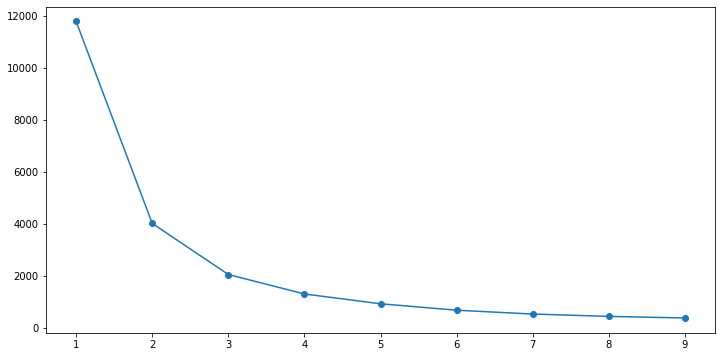

In [26]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10)
cluster_errors = [] # cluster_errors
cluster_sil_scores = []
for i in cluster_range:
    clusters = KMeans( n_clusters=i, n_init = 5)
    clusters.fit(scaled_data)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_ 
    cluster_errors.append( clusters.inertia_ )
df2=pd.DataFrame({"custers_num":cluster_range,"cluster_errors":cluster_errors})
print(df2)
plt.figure(figsize=(12,6))  # It will show the figure
plt.plot( df2['custers_num'],df2['cluster_errors'],marker="o" )
plt.show()

* From the elbow plot we can see that the opmised cluster is 2.

### 4.2 Finding the number of clusters using Agglomerative clustering approach

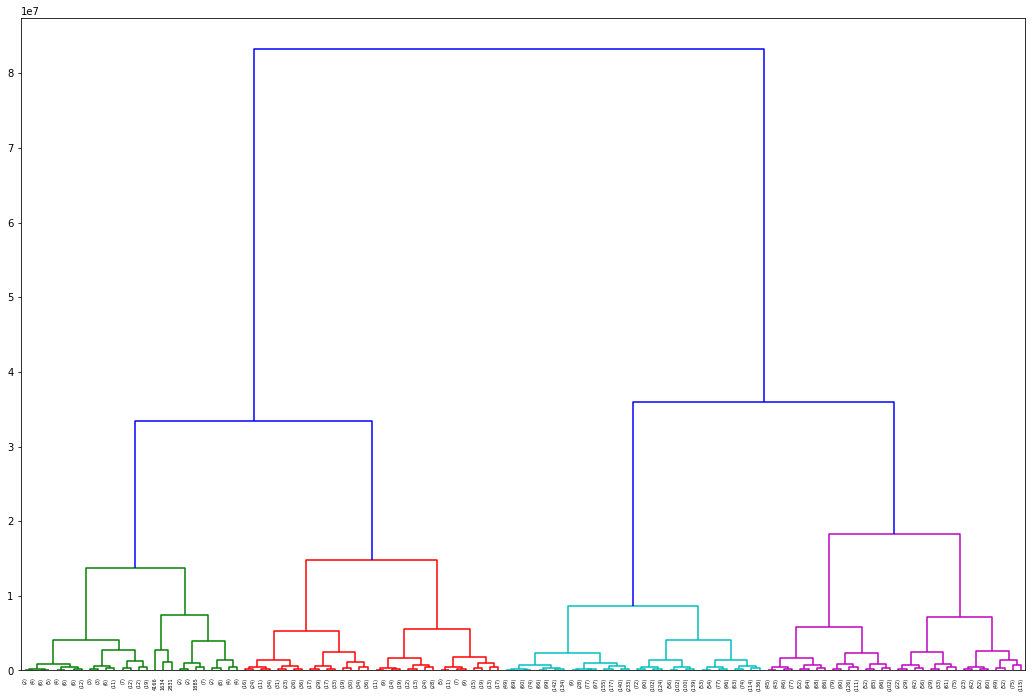

In [27]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18,12))
dendrogram(linkage(X, method='ward'), p=6,color_threshold=20000000,orientation='top',truncate_mode='level',labels=final_data.index)
plt.show()

As it is not clear with all data,  we will go ahead and do the samlpling of the data to find the clusters

### 4.2.1 Sampling

In [28]:
a=X.sample(n=50)

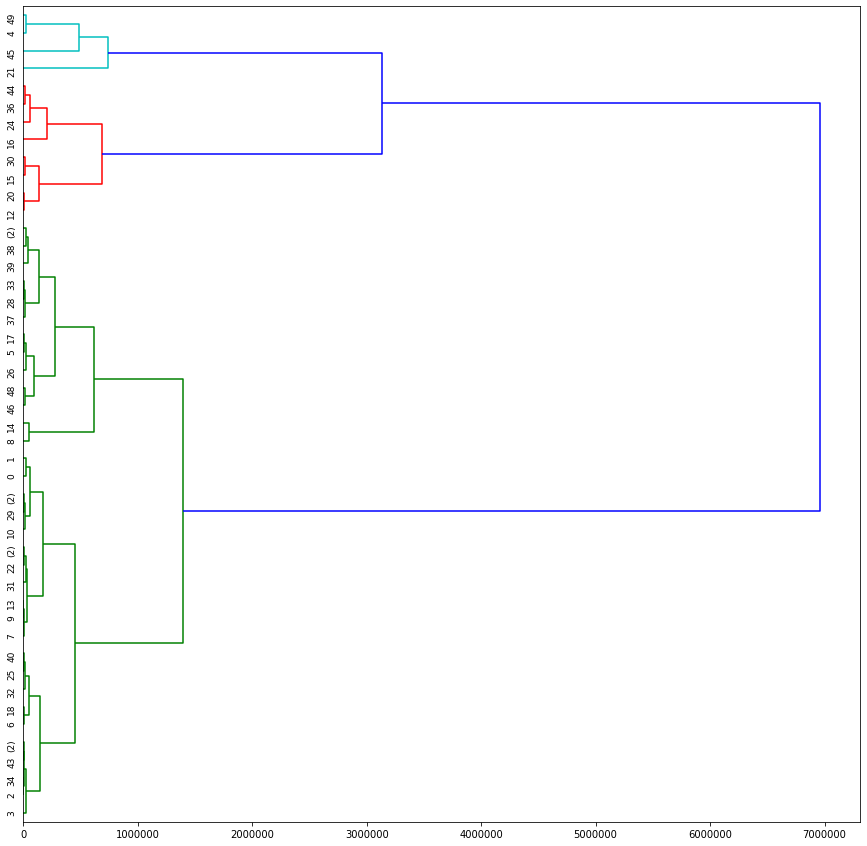

In [29]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(15,15))
dendrogram(linkage(a, method='ward'), p=6,color_threshold=2000000,orientation='right',truncate_mode='level',leaf_rotation=90,leaf_font_size=9)
plt.show()

* From this we can see that the number optimised clusters is at 4.


In [30]:
final_data1=final_data.copy()

### 4.3 Clustering the data with Agglomerative approach

In [31]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
model.fit(X)
final_data1['label']=model.labels_

### 4.4 Visualize the clusters using scatter plot (total purchase and total_count)


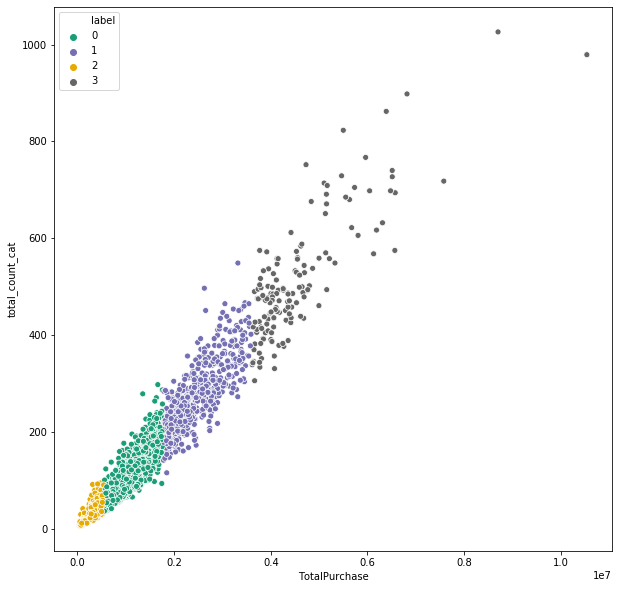

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=final_data1,x='TotalPurchase',y='total_count_cat',hue='label',palette="Dark2")
plt.show()

In [34]:
# Difference between the means of diffrent groups.
print(final_data1[final_data1['label']==0]['TotalPurchase'].mean())
print(final_data1[final_data1['label']==1]['TotalPurchase'].mean())
print(final_data1[final_data1['label']==2]['TotalPurchase'].mean())
print(final_data1[final_data1['label']==3]['TotalPurchase'].mean())

998599.8640157094
2402215.1355140186
272364.60568441683
4541289.033112583


### 4.5  Making sense of each cluster

#### Normal Customers:

* We can see that clear differance in means of the purchase of the peoples.
* we can see that the peoples who are falling in the __Group 2__ these are those peoples who buy less quantity and spend less amount on the purchases.

In [35]:
final_data1[final_data1['label']==2]['User_ID'].head(5)

0    1000001
2    1000003
3    1000004
5    1000006
6    1000007
Name: User_ID, dtype: int64

#### Above normal Customers: 

* we can see that the peoples who are falling in the __Group 0__ these are those peoples who also buy less quantity and spend less amount on the purchases.

In [36]:
final_data1[final_data1['label']==0]['User_ID'].head(5)

1     1000002
4     1000005
7     1000008
8     1000009
10    1000011
Name: User_ID, dtype: int64

#### Moderate Customers: 

* we can see that the peoples who are falling in the __Group 1__ these are those peoples who  buy good quantity and spend good amount on the purchases.

In [37]:
final_data1[final_data1['label']==1]['User_ID'].head(5)

9     1000010
17    1000018
32    1000033
35    1000036
45    1000048
Name: User_ID, dtype: int64

#### premium Customers:

* we can see that the peoples who are falling in the __Group 3__ these are those peoples who buy high quantity and spend high amount on the purchases.

In [38]:
final_data1[final_data1['label']==3]['User_ID'].head(5)

50     1000053
144    1000148
145    1000149
191    1000195
346    1000352
Name: User_ID, dtype: int64

## 5.  Conclusion 

 - Cluster 3 users may be wholesale or premium buyers as the purchase quantity and total purchase are high.
 - Cluster 1 users may be compulsive shoppers who shop at any time irrespective of sales.
 - Cluster 0 users may be sales addicts who shop moderately.
 - Cluster 2 users might be  hunters who particularly buy specific products in a single quantity as their quantity and     total purchase are low.

From our model we will foucus on customer lable type 0 and 1 and we will take various steps and these might be the reasons:

- __Lack of awareness:__ Consumers cannot purchase products they are not aware of. If you are marketing, but consumers still don't know about your product, it may be time to evaluate why it's not working. Are you targeting the right market with your message? Is your message reaching those who would have an interest in your product? It's important to remember that the solution is not always more marketing, because the problem may lie with where you are marketing and what marketing vehicles you are using. Assess the key demographics of your target market and research where your marketing efforts are most likely to reach them.

* __Lack of understanding:__ Consumers don't buy products solely based on price. They do factor in price, but they buy based on the benefits your product brings them. If you asked your customers what the benefits of your product are, would they know? This is important. Your marketing must be centered on the benefits of your product in order for consumers to take an interest in purchasing your product. Create a list of the top three benefits of your product and use those in your marketing message.

* we will focuse on these points and then work on it.